In [1]:
# Aula 07 - Machine Learning - Regressão linear
! pip install numpy # Instalação completa da biblioteca numpy

Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [2]:
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------------------ --------------- 5.2/8.7 MB 30.7 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 25.3 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   --------- ------------------------------ 9.4/38.5 MB 45.9 MB/s eta 0:00:01
   ----------------- ---------------------- 16.8/38.5 MB 41.6 MB/s eta 0:00:01
   --------------------------- ------------ 26.7/38.5 MB 42.8 MB/s eta 0:00:01
   ---------------------------------- ----- 33.6/38.5 MB 40.0 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.5 MB 40.1 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 36.7 MB/s  0:00:01

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
#Dados de treinamento
vazao = np.array([10, 20, 30, 5, 35, 40]).reshape(-1,1) # Vazão de água em m3/min
nivel = np.array([50, 60, 70, 45, 80, 85]) # Nível do tanque em metros

# Criar e treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(vazao, nivel)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
# Dados de teste
#vazao_teste = np.array([15, 25, 33]).reshape(-1, 1) # Vazão de água em m3/min
vazao_teste = np.array([5, 2, 7, 30, 50]).reshape(-1, 1) #Vazão da água em m3/min

# Fazer previsões com base na vazão de água
nivel_previsto = modelo.predict(vazao_teste)
nivel_previsto

array([44.02542373, 40.59322034, 46.31355932, 72.62711864, 95.50847458])

Vazao: 5 m3/min - Nível previsto: 44.02542372881356 metros
Vazao: 2 m3/min - Nível previsto: 40.59322033898305 metros
Vazao: 7 m3/min - Nível previsto: 46.313559322033896 metros
Vazao: 30 m3/min - Nível previsto: 72.62711864406779 metros
Vazao: 50 m3/min - Nível previsto: 95.50847457627117 metros


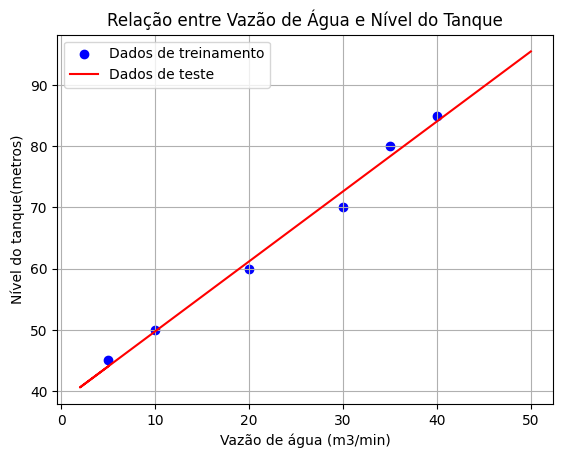

In [10]:
# imprimir as previsões 
for i in range(len(vazao_teste)):
    print(f"Vazao: {vazao_teste[i][0]} m3/min - Nível previsto: {nivel_previsto[i]} metros")

plt.scatter(vazao, nivel, color='blue', label ='Dados de treinamento')
plt.plot(vazao_teste, nivel_previsto, color='red', label = 'Dados de teste')
plt.xlabel('Vazão de água (m3/min)')
plt.ylabel('Nível do tanque(metros)')
plt.title('Relação entre Vazão de Água e Nível do Tanque')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Exercício 02 - Regressão polinomial
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [40]:
# Dados fornecidos
Q = np.array([100,200,300,400,500,600,700]).reshape(-1,1) # quantidade de calor
T = np.array([30,35,40,45,60,100,150]) # Temperatura


In [17]:
print(Q)
print(T)

[[100]
 [200]
 [300]
 [400]
 [500]
 [600]
 [700]]
[ 30  35  40  45  50  55  60 100 150]


In [41]:
# Modelo 1 Regressão Linear simples
linear_model = LinearRegression()
linear_model.fit(Q,T) # Treina o modelo
T_linear_pred = linear_model.predict(Q) # Realiza predições de temperatura com regressão linear
print(T_linear_pred)

[ 11.07142857  29.28571429  47.5         65.71428571  83.92857143
 102.14285714 120.35714286]


In [42]:
# Modelo 2 Regressão polinomial grau 2
poly = PolynomialFeatures(degree=2) # cria modelo polinomial
Q_poly = poly.fit_transform(Q) # treina modelo
poly_model = LinearRegression() # Armazena modelo
poly_model.fit(Q_poly,T)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


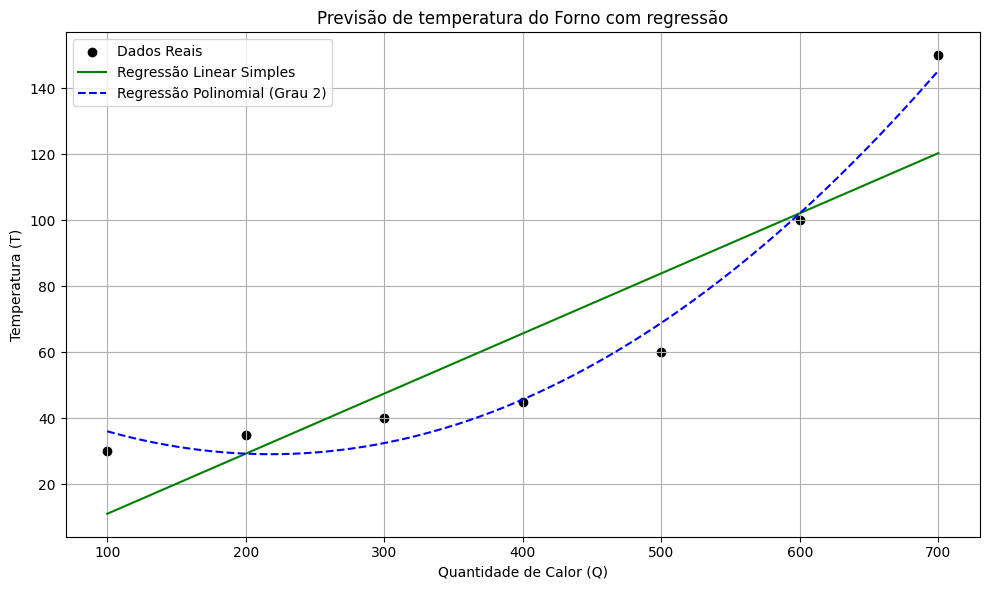

In [43]:
# Geração de valores para curvas
Q_range=np.linspace(100,700,500).reshape(-1,1)
T_linear_curve = linear_model.predict(Q_range)
t_poly_curve = poly_model.predict(poly.transform(Q_range))
# plotagem do gráfico com os modelos de machine learning
plt.figure(figsize=(10,6))
plt.scatter(Q,T,color='black',label ='Dados Reais')
plt.plot(Q_range,T_linear_curve,color='green',label='Regressão Linear Simples')
plt.plot(Q_range,t_poly_curve,color='blue',linestyle='--',label='Regressão Polinomial (Grau 2)')
plt.title('Previsão de temperatura do Forno com regressão')
plt.xlabel('Quantidade de Calor (Q)')
plt.ylabel('Temperatura (T)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()